In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mplcolors
import sklearn.datasets as skdatasets
import pandas as pd

In [2]:
def load_iris_dataset():
    # import data
    iris = skdatasets.load_iris()
    # only take the first two features
    X = iris.data[:, :2]
    y = iris.target
    return X, y

In [3]:
X, y = load_iris_dataset()
X = np.array(X)
y = np.array(y)

print(X.shape)
print(y.shape)

(150, 2)
(150,)


In [4]:
df_X, df_y = pd.DataFrame(X), pd.DataFrame(y)

In [5]:
df_X.head()

,0,1
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [6]:
df_y.tail()

,0
145,2
146,2
147,2
148,2
149,2


Components:
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
Explained variance ratio:
 [0.55878489 0.44121511]
cumulative explained variance
 [0.55878489 1.        ]
Transformed data shape: (150, 2)


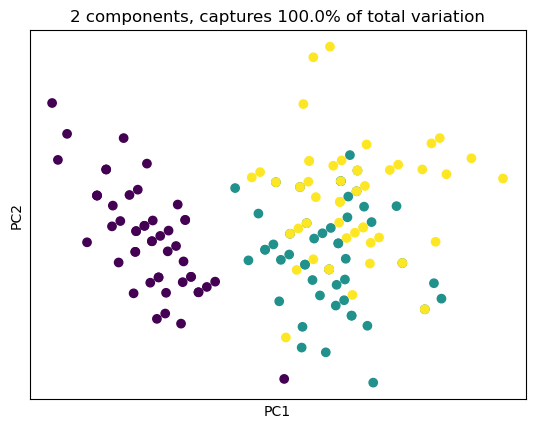

In [7]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X_std)

print('Components:\n', pca.components_)
print('Explained variance ratio:\n', pca.explained_variance_ratio_)

cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)
print('cumulative explained variance\n', cum_explained_variance)

X_pca = pca.transform(X_std)
print('Transformed data shape:', X_pca.shape)   

plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
plt.xlabel('PC1'); plt.xticks([]) 
plt.ylabel('PC2'); plt.yticks([])
plt.title('2 components, captures {}% of total variation'.format(cum_explained_variance[1].round(4)*100))
plt.show()

# Custom Implementation 

In [8]:
n_components = 2

# standardization
mean = np.mean(X, axis=0)
scale = np.std(X, axis=0)
X_std = (X - mean) / scale

# eigendecomposition 
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# adjusting the eigenvectors that are largest in absolute value to be positive 
max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)   
signs = np.sign(eig_vecs[max_abs_idx, range(eig_vecs.shape[0])])
eig_vecs = eig_vecs * signs[np.newaxis,:]
eig_vecs = eig_vecs.T

print('Eigenvalues \n', eig_vals)   
print('Eigenvectors \n', eig_vecs)


Eigenvalues 
 [1.12507025 0.88835257]
Eigenvectors 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [11]:
# rearrange the eigenvectors and eigenvalues 
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i,:]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)

eig_vals_sorted = np.array([x[0] for x in eig_pairs])
eig_vecs_sorted = np.array([x[1] for x in eig_pairs])

components = eig_vecs_sorted[:n_components,:]

explained_variance_ratio = [i/np.sum(eig_vals) for i in eig_vals_sorted[:n_components]]
cum_explained_variance = np.cumsum(explained_variance_ratio)

# transform 
X = X.copy()
X_std = (X - mean) / scale
X_proj = X_std.dot(components.T)



print('Components:\n', components)
print('Explained variance ratio\n', explained_variance_ratio)
print('Cumulative explained variance from scratch\n', cum_explained_variance)

print('Transformed data shape from scratch:', X_proj.shape)


Components:
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
Explained variance ratio
 [0.5587848920665011, 0.4412151079334989]
Cumulative explained variance from scratch
 [0.55878489 1.        ]
Transformed data shape from scratch: (150, 2)
